In [45]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

# Reading the files

In [46]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


Warning in <TROOT::Append>: Replacing existing TH1: hdist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/ResVSDist_colz.png has been created


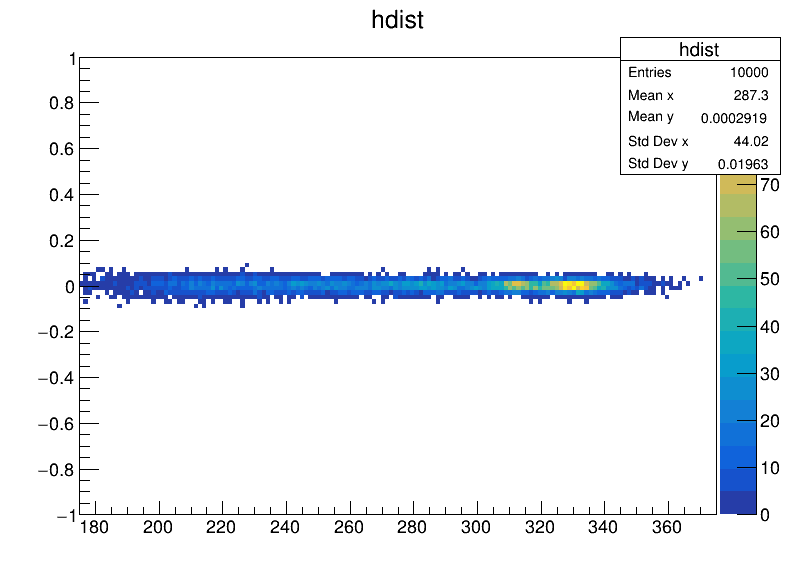

In [47]:
hdist = ROOT.TH2D("hdist","hdist",150,175,375,100,-1,1)

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    #print("entry number: ",str(iev))
    if (tree.part.fStatusMaskIn[1]!=31 or tree.part.fParamMC.size()==0): continue

    xyz_st = [tree.part.fParamMC[1].GetX(),tree.part.fParamMC[1].GetParameter()[0],tree.part.fParamMC[1].GetParameter()[1]]
    alpha_st = tree.part.fParamMC[1].GetAlpha()
    xyz_gl_st = [xyz_st[0]*np.cos(alpha_st)-xyz_st[1]*np.sin(alpha_st), xyz_st[0]*np.sin(alpha_st)+xyz_st[1]*np.cos(alpha_st), xyz_st[2]]
    x_g = xyz_gl_st[0]
    y_g = xyz_gl_st[1]
    length=0

    

    for i in range(2,tree.part.fParamMC.size()-1):
        xyz = [tree.part.fParamMC[i].GetX(),tree.part.fParamMC[i].GetParameter()[0],tree.part.fParamMC[i].GetParameter()[1]]
        alpha = tree.part.fParamMC[i].GetAlpha()
        xyz_gl = [xyz[0]*np.cos(alpha)-xyz[1]*np.sin(alpha), xyz[0]*np.sin(alpha)+xyz[1]*np.cos(alpha), xyz[2]]
        d = np.sqrt(np.square(xyz_gl[0]-xyz_gl_st[0])+np.square(xyz_gl[1]-xyz_gl_st[1])+np.square(xyz_gl[2]-xyz_gl_st[2]))
        length=length+d
        #print(xyz,alpha,length)
        #if(np.abs(xyz[0])==250 or tree.part.fLoop[i]==1): break
        if(tree.part.fLoop[i]==1): break
        xyz_gl_st=xyz_gl
        alpha_st=alpha
    
    res=(tree.part.fParamMC[1].GetP()-tree.part.fParamIn[1].GetP())/tree.part.fParamMC[1].GetP()
    if (length!=0): hdist.Fill(length,res)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
hdist.Draw("COLZ")
cp.Draw()
save=folder+"ResVSDist_colz"+".png"
cp.Print(save)
        
        

 FCN=2.52506 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=1.41051e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.68921e+01   4.39594e+00   3.17380e-03   2.62472e-05
   2  Mean         4.57636e-03   2.41516e-03   2.19241e-06   5.47612e-02
   3  Sigma        3.14626e-02   1.93238e-03   1.47924e-05   4.88755e-03
 FCN=8.20759 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=8.0011e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.98707e+02   9.60017e+00   1.15121e-02   3.39129e-05
   2  Mean         3.59111e-04   1.08118e-03   1.53131e-06  -1.72827e-03
   3  Sigma        2.62787e-02   7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarlite/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/ResVSDist.png has been created


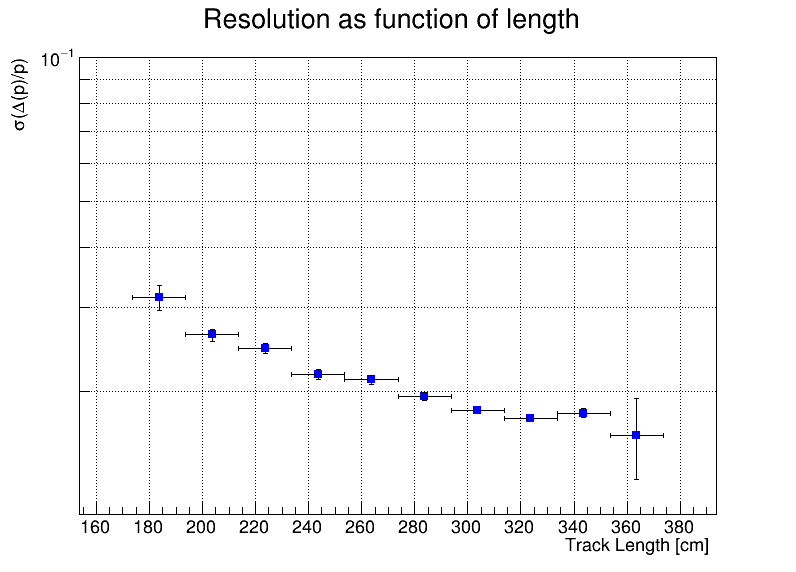

In [48]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')
npoints = 10

for d in range(0,npoints):
     low = int((d)*hdist.GetNbinsX()/npoints)
     high = int((d+1)*hdist.GetNbinsX()/npoints)
     lowloc = hdist.GetXaxis().GetBinLowEdge(low)
     highloc = hdist.GetXaxis().GetBinLowEdge(high)
     
     histo = hdist.ProjectionY("histoproj_"+str(d),low,high)
     fun = ROOT.TF1("f_"+str(d),"gaus")
     histo.Fit("f_"+str(d))
     y.append(fun.GetParameter(2))
     ey.append(fun.GetParError(2))
     x.append((lowloc+highloc)/2)
     ex.append(np.abs(lowloc-highloc)/2)

graph = ROOT.TGraphErrors(len(x),x,y,ex,ey)


hq = ROOT.TCanvas("hq","hq",800,600)
hq.SetGrid()
hq.SetLogy()
graph.SetTitle("Resolution as function of length;Track Length [cm];#sigma(#Delta(p)/p)")
graph.SetMarkerColor(4)
graph.SetMarkerSize(1)
graph.SetMarkerStyle(21)         
graph.GetHistogram().SetMaximum(0.1)  #   Y
graph.Draw("AP")
hq.Draw()
save=folder+"ResVSDist"+".png"
hq.Print(save)
